## Probability Recap

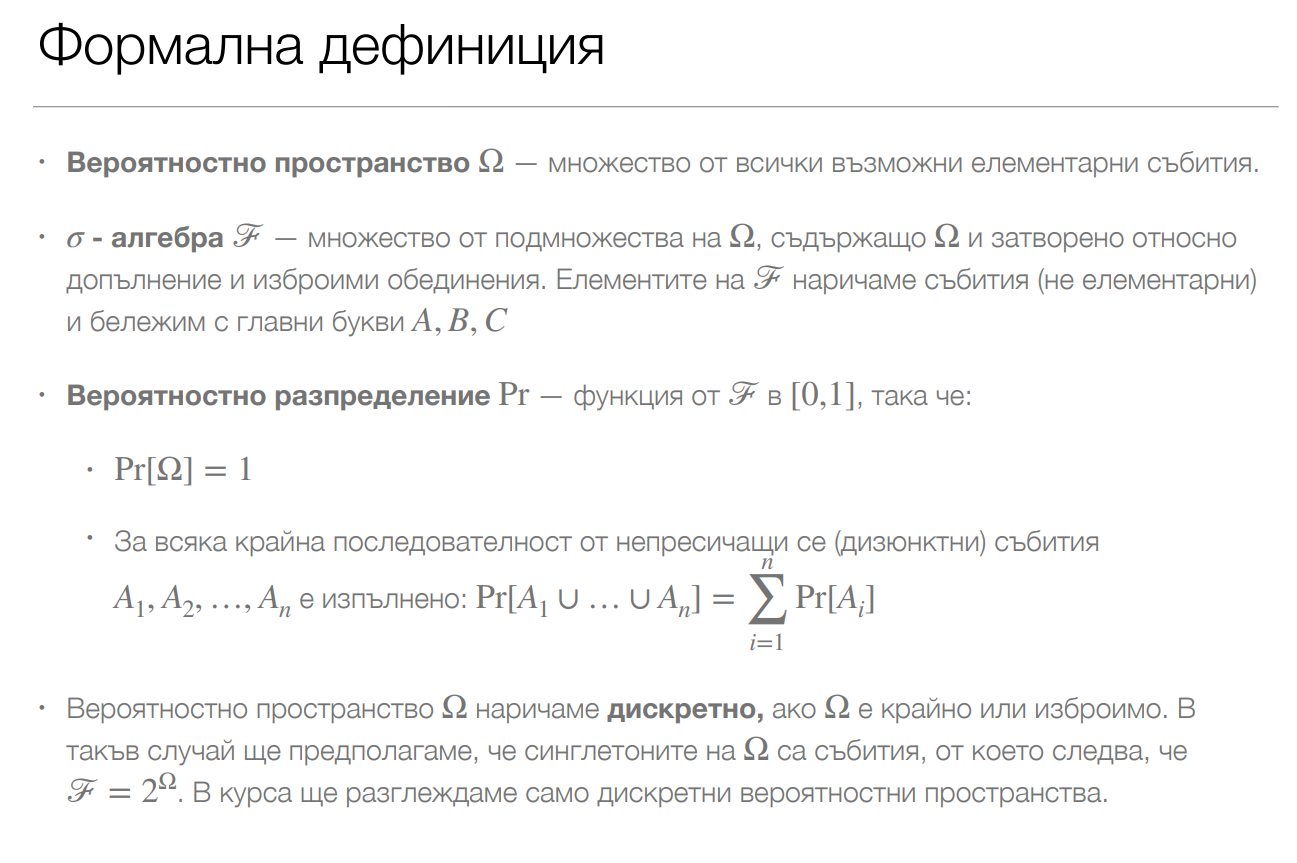

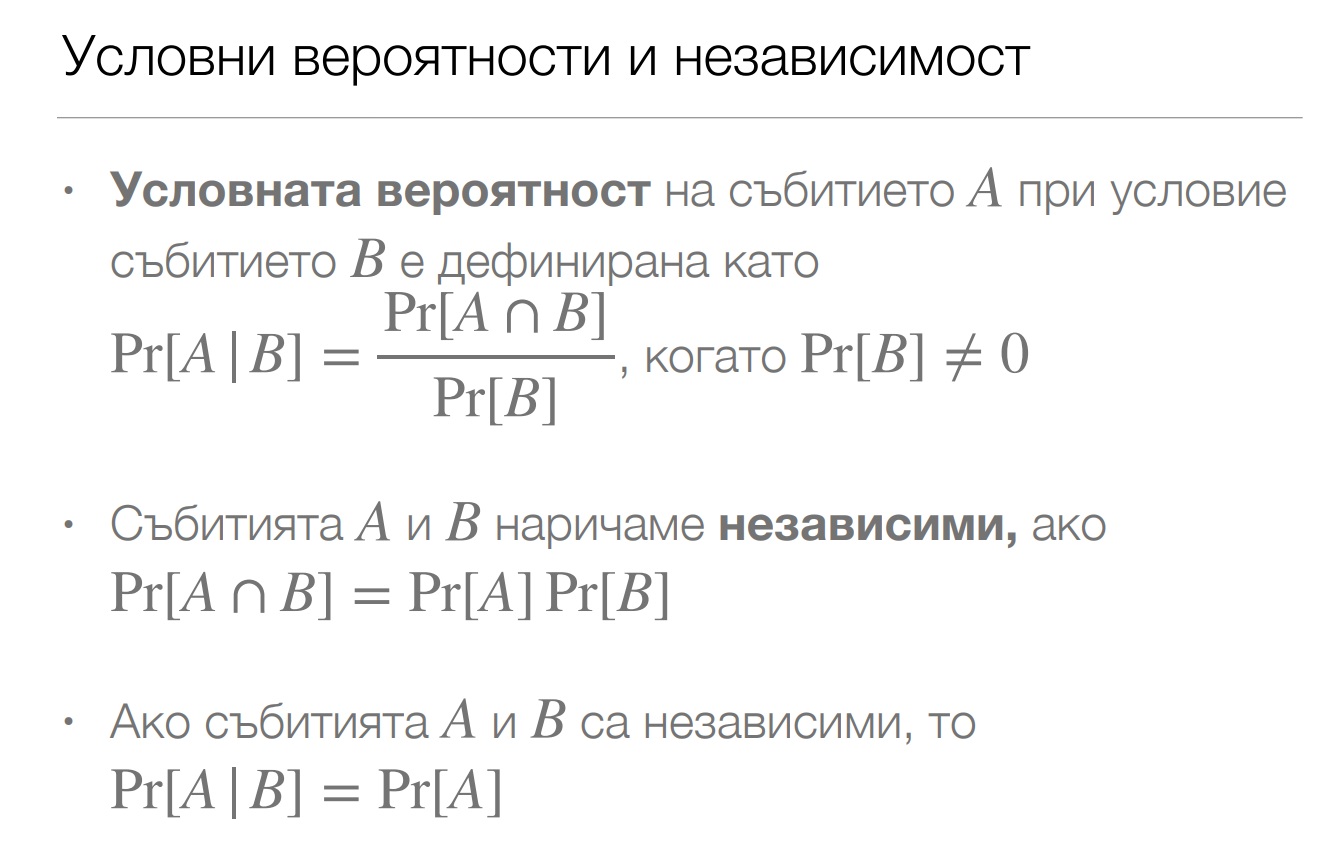

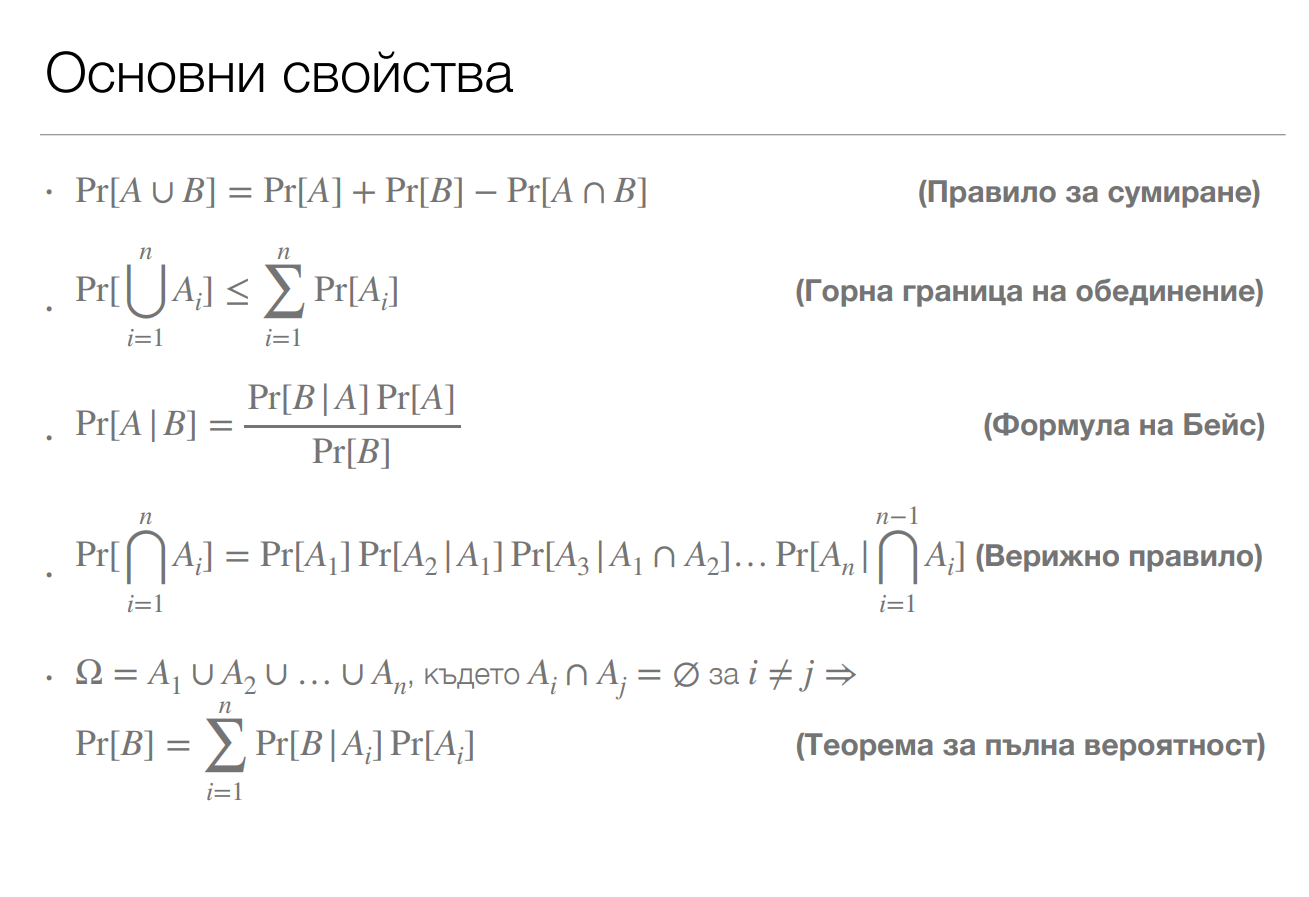

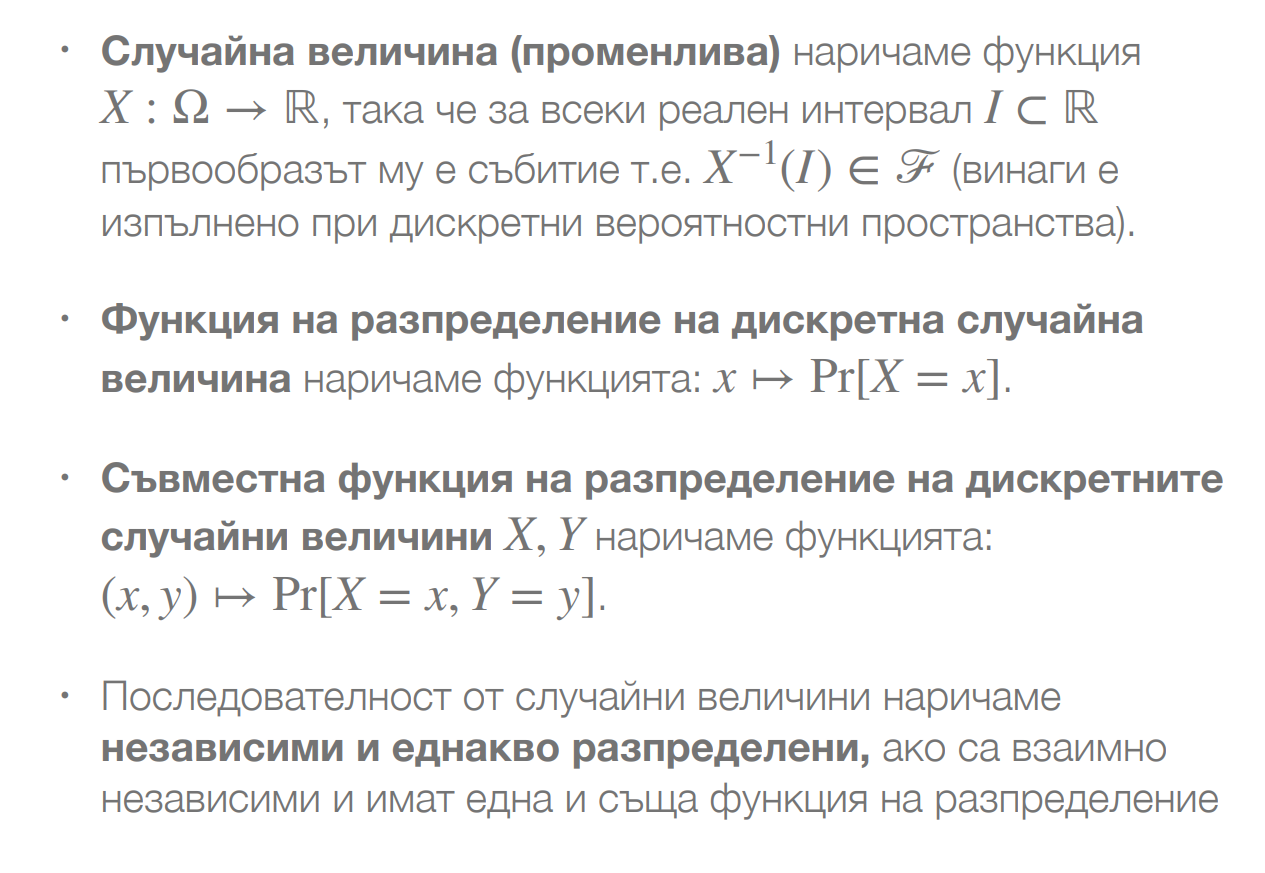

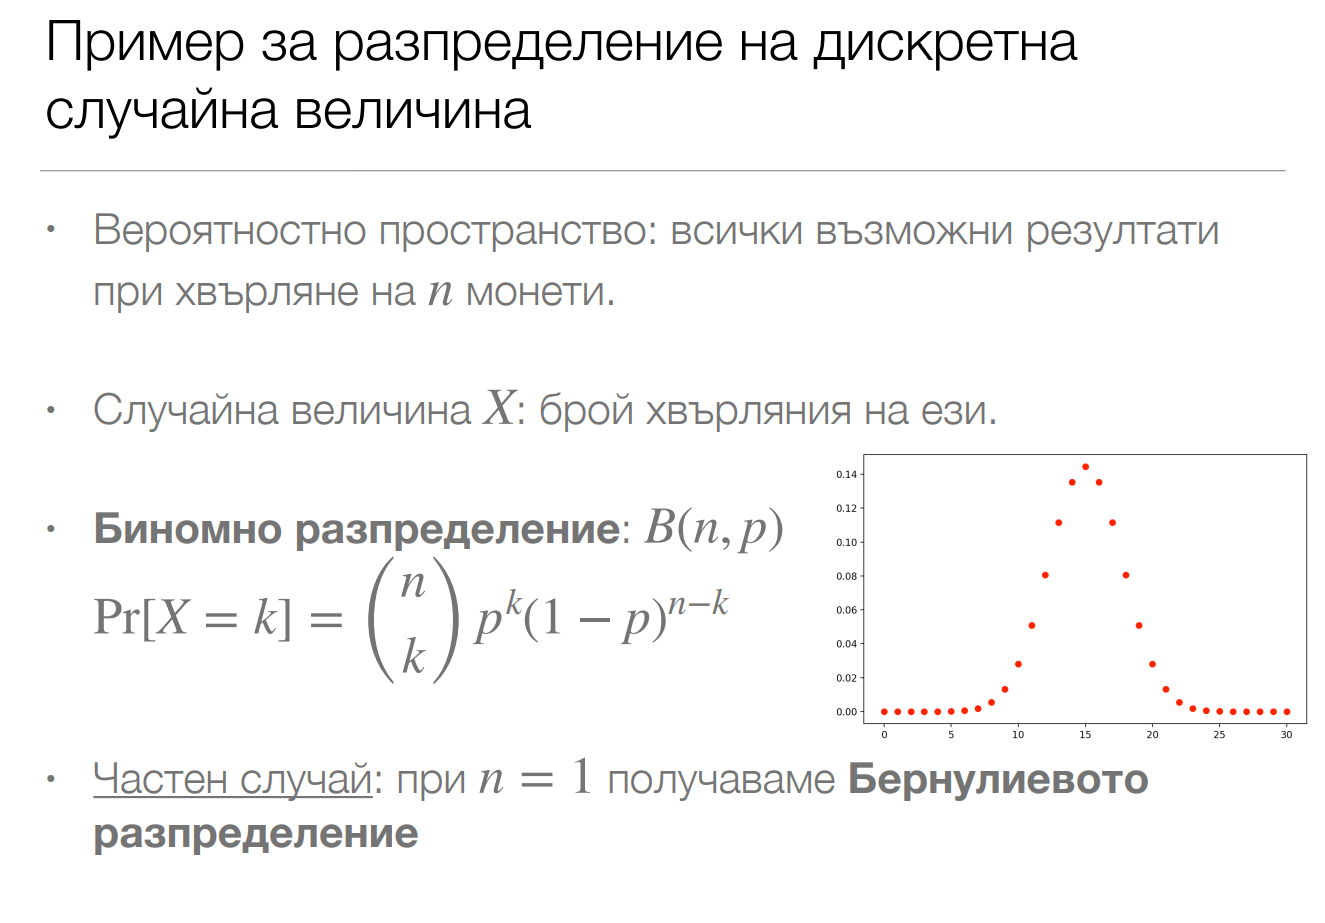

## Bernoulli document model and Bernoulli Naive Base

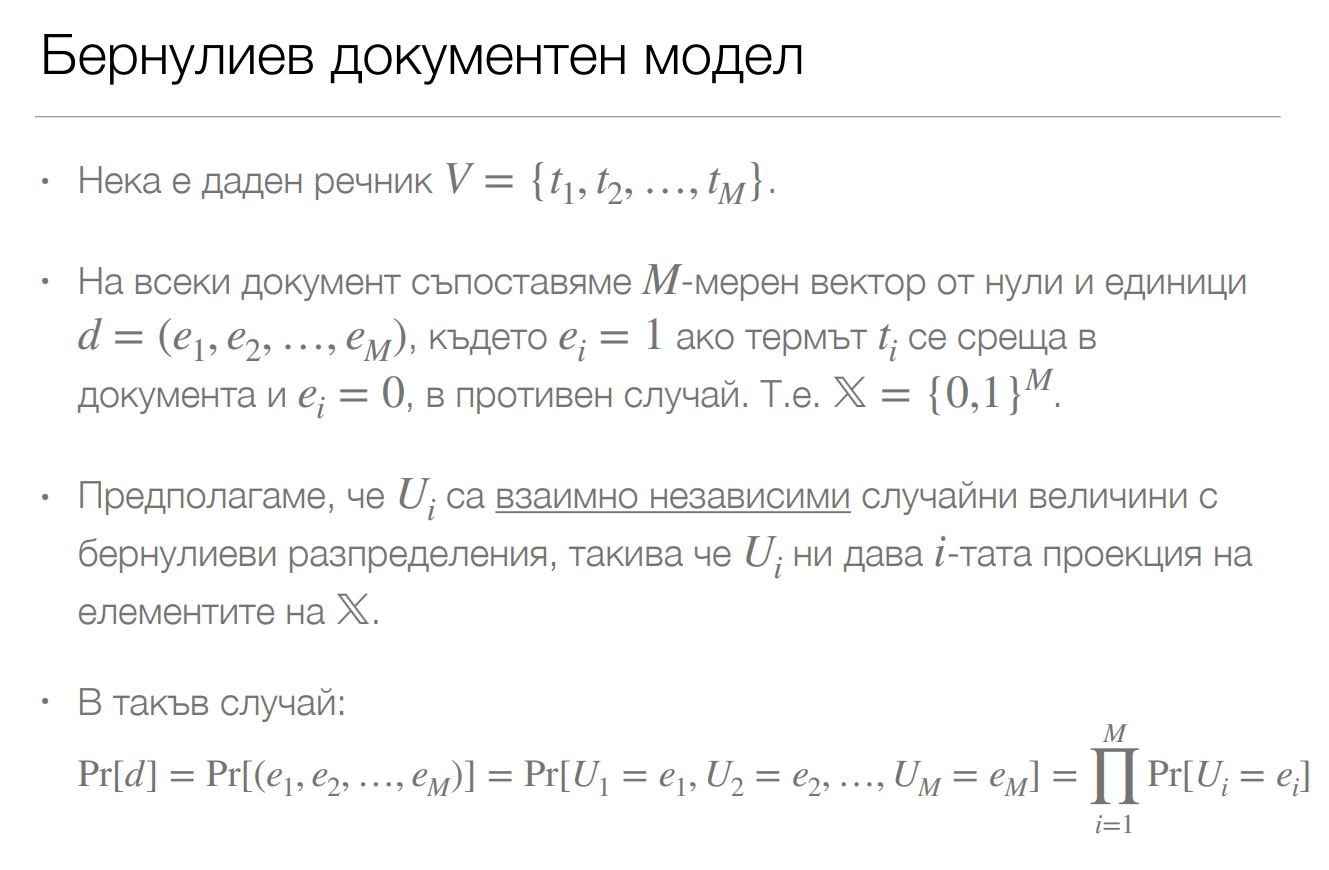

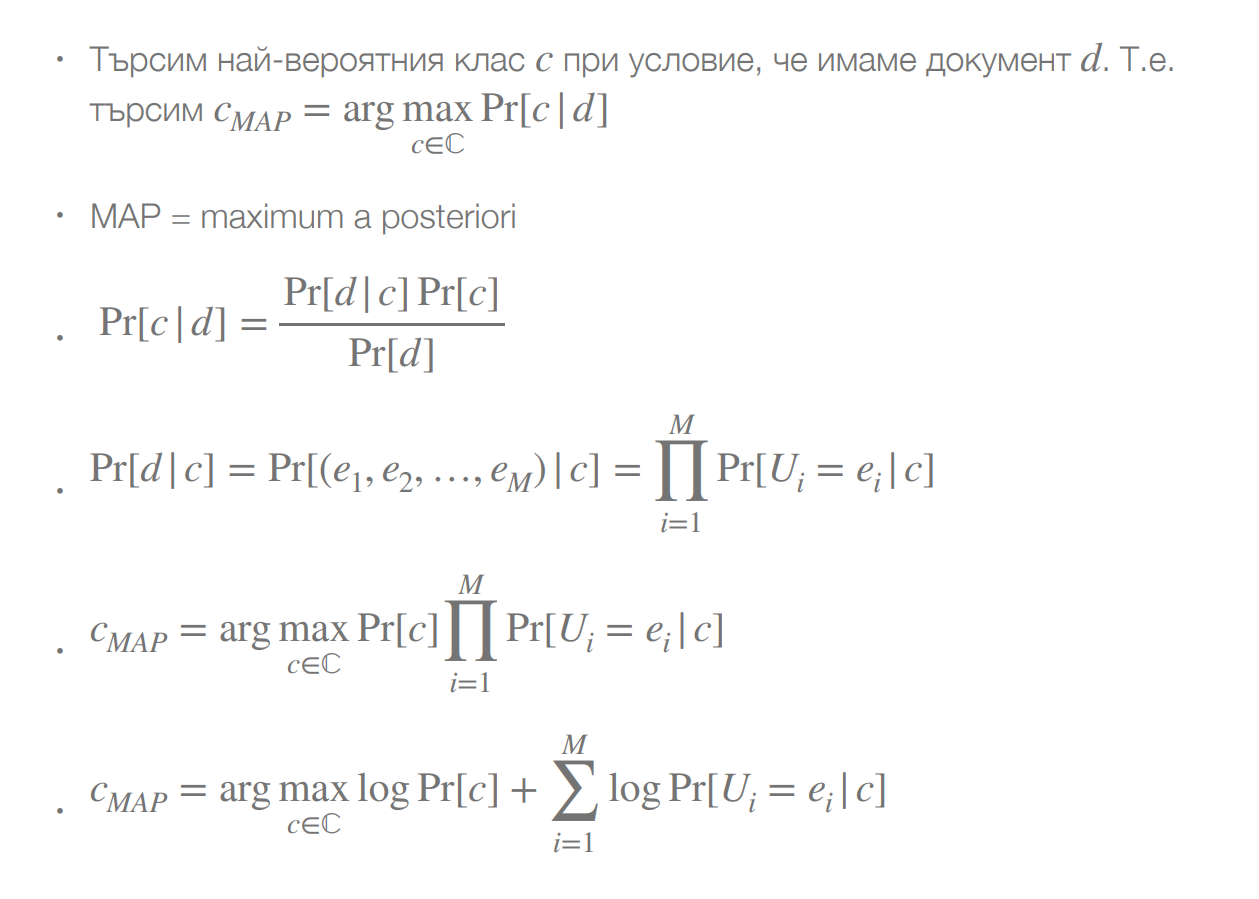

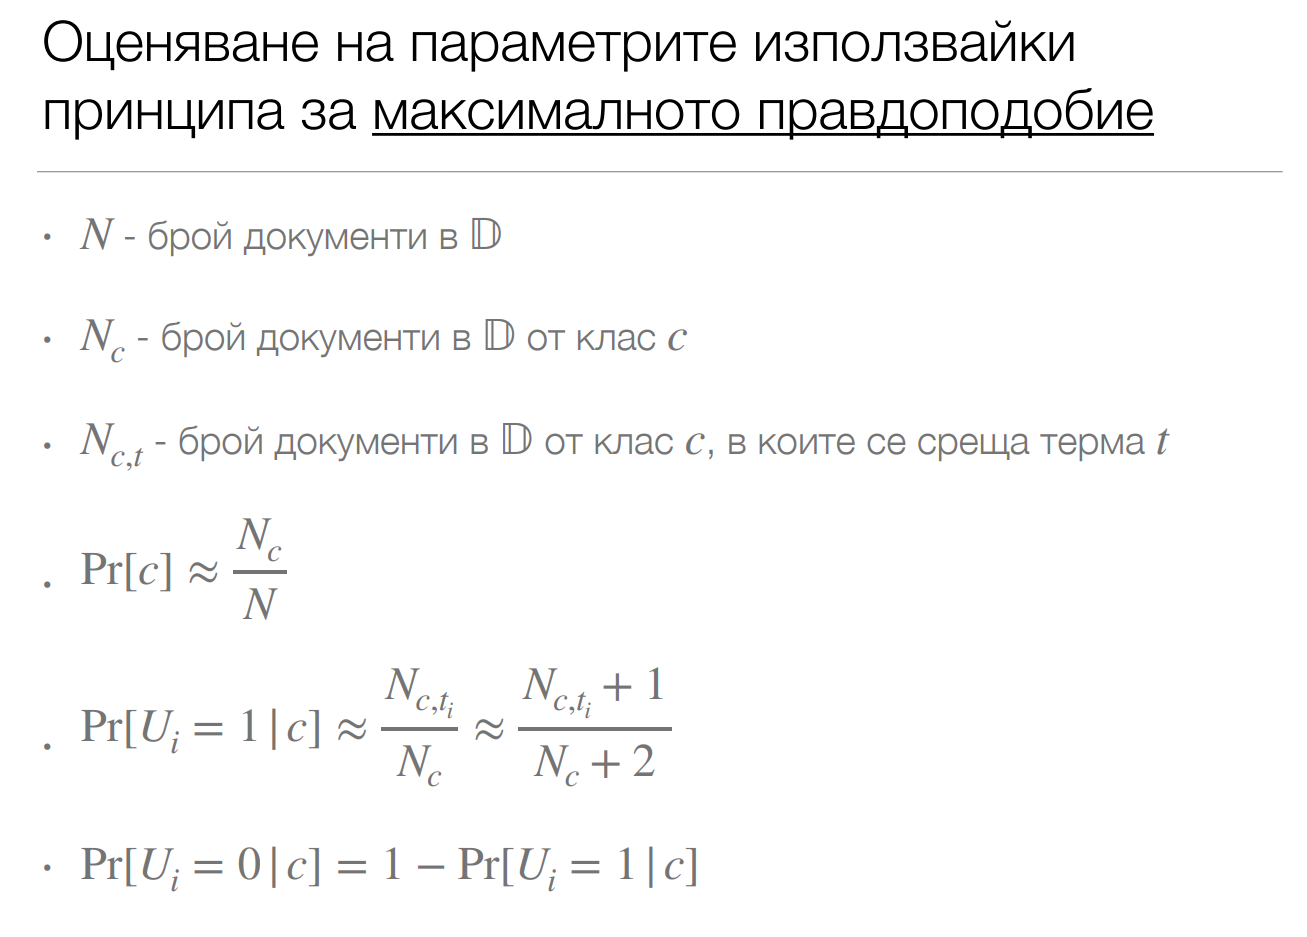

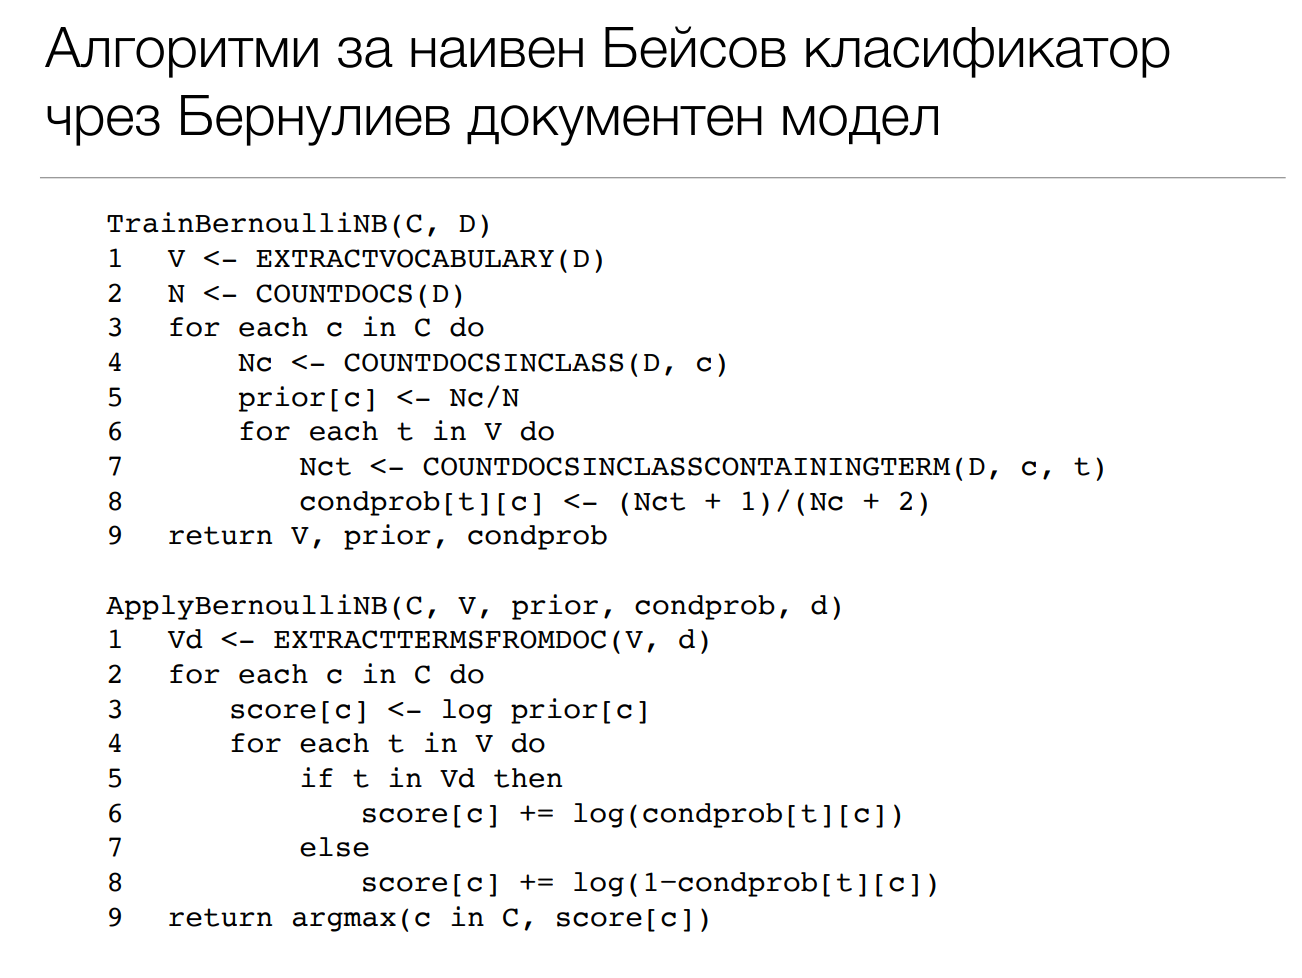

## Multinomial Naive Base

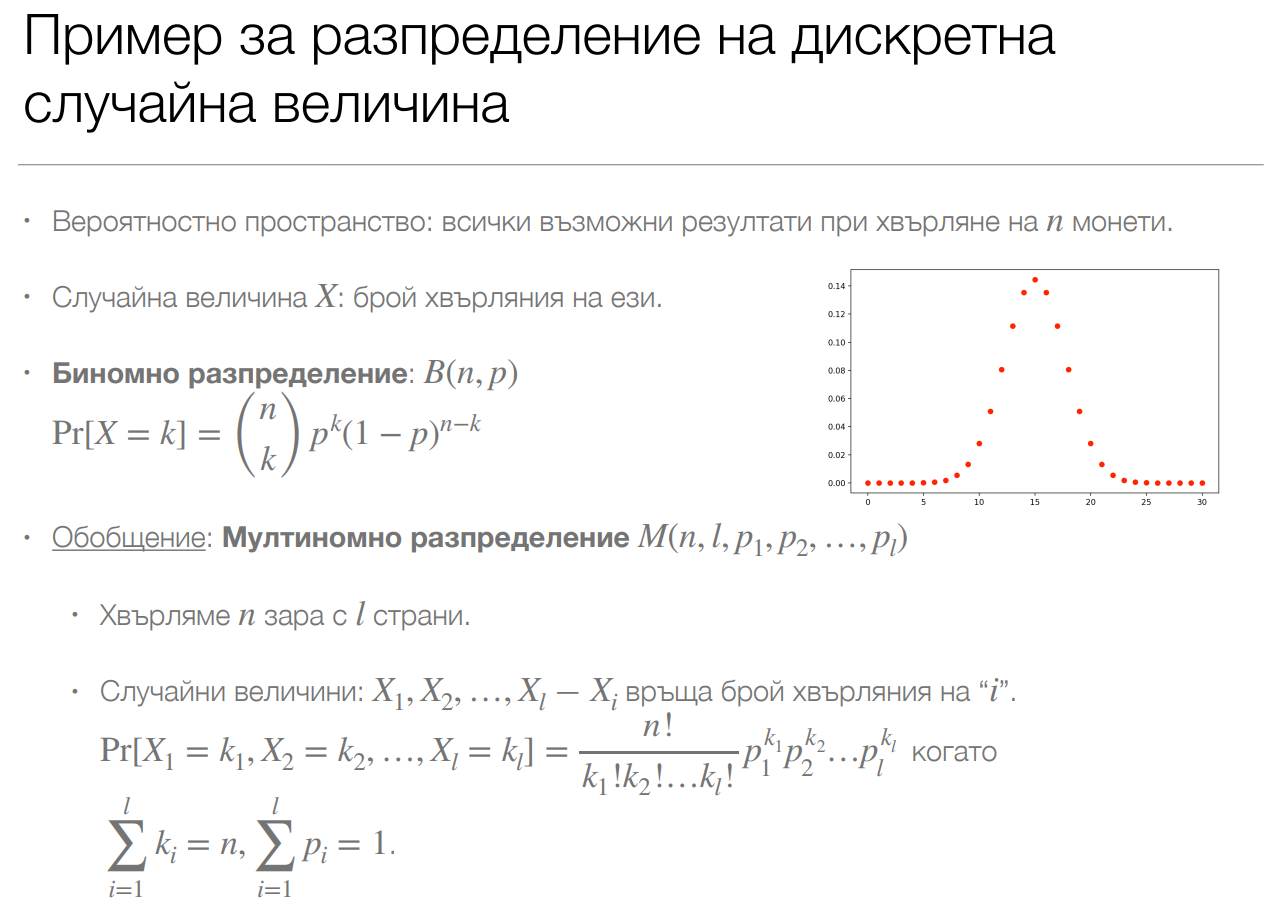

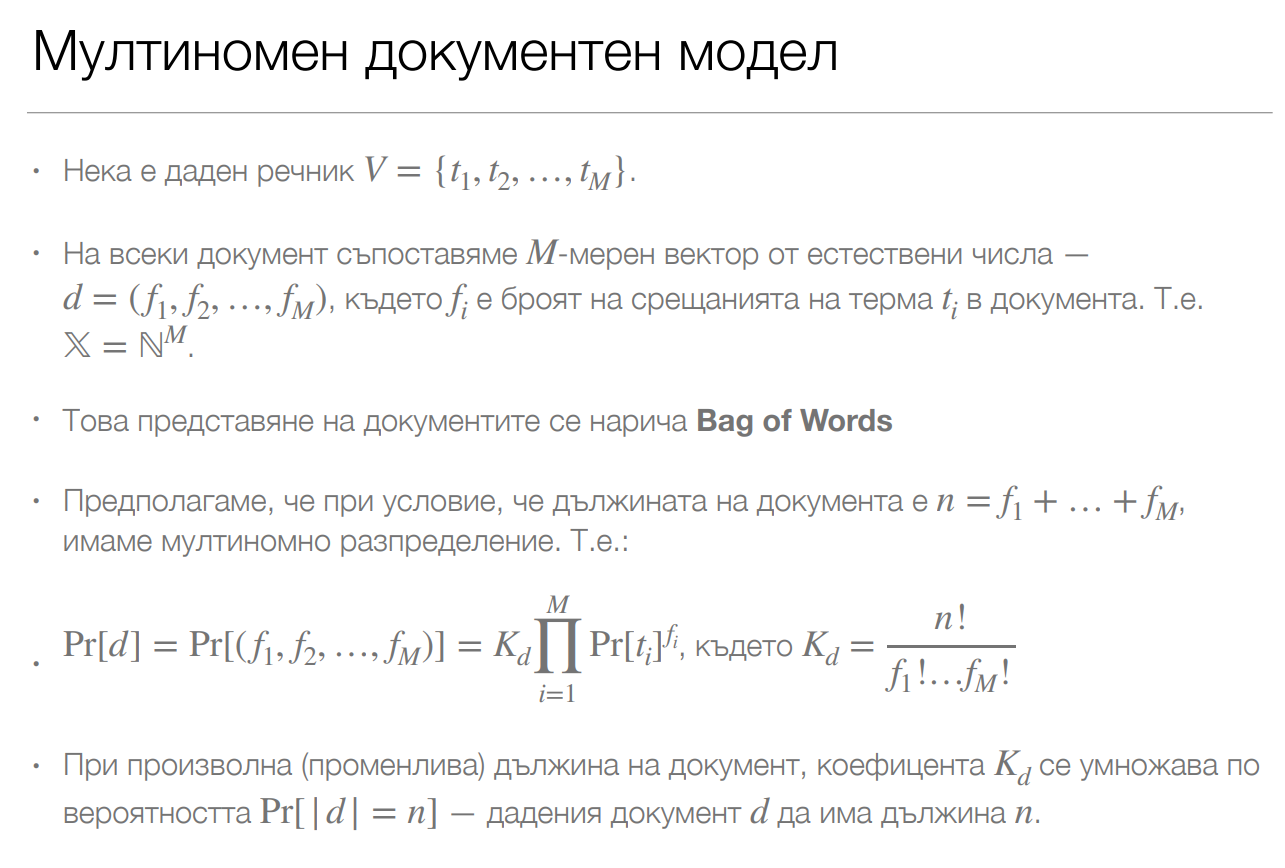

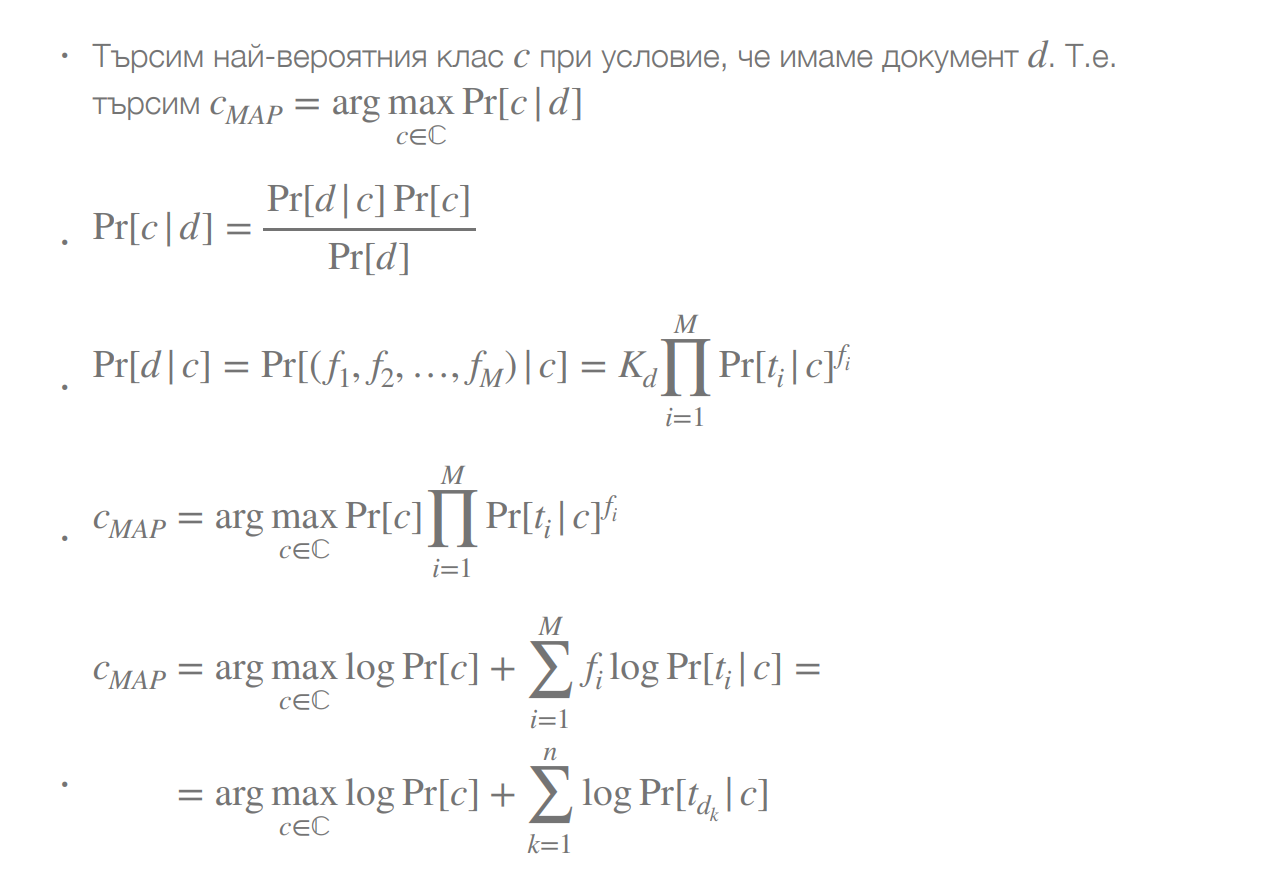

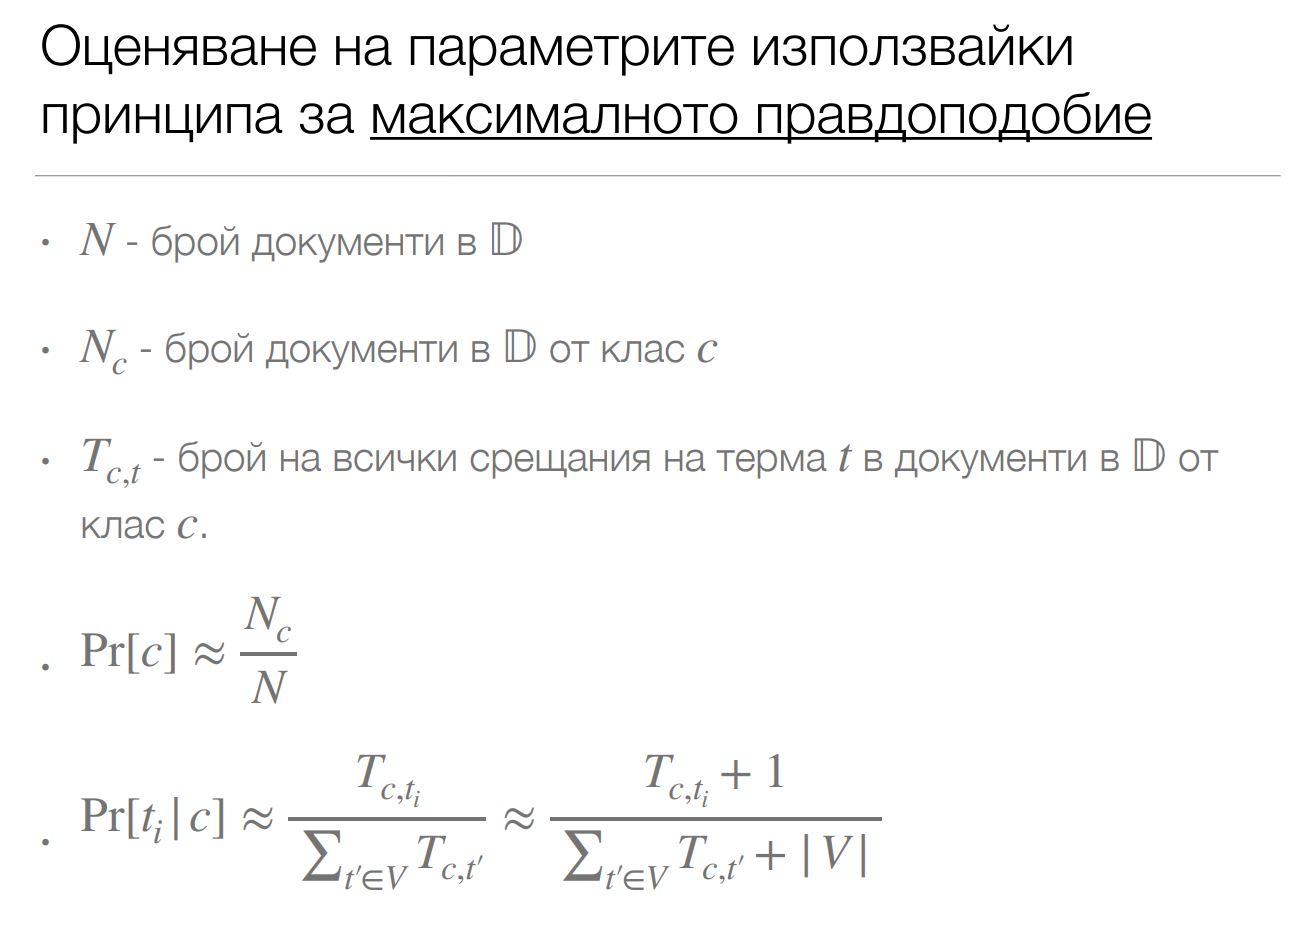

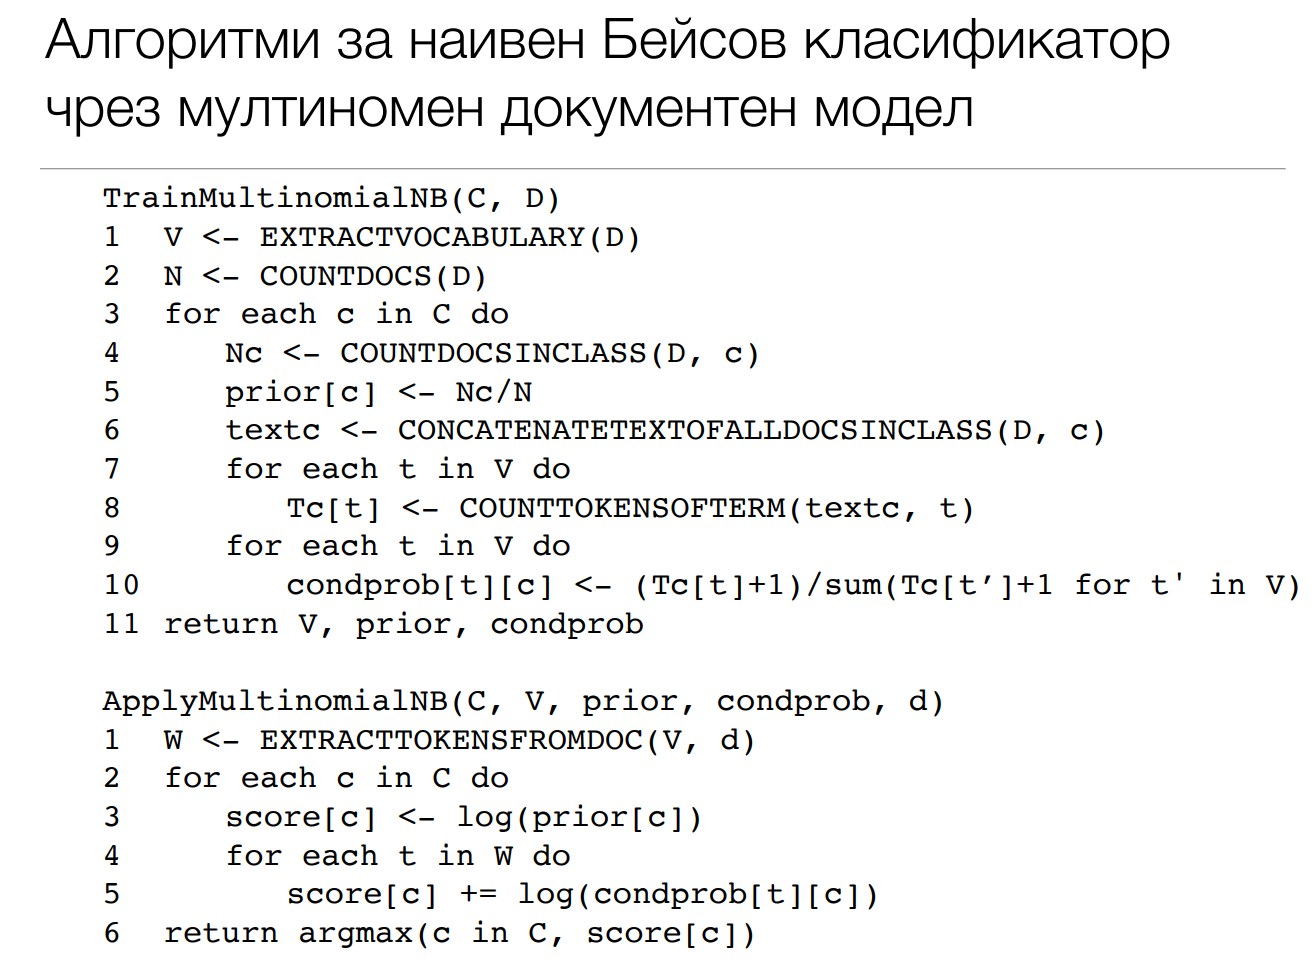

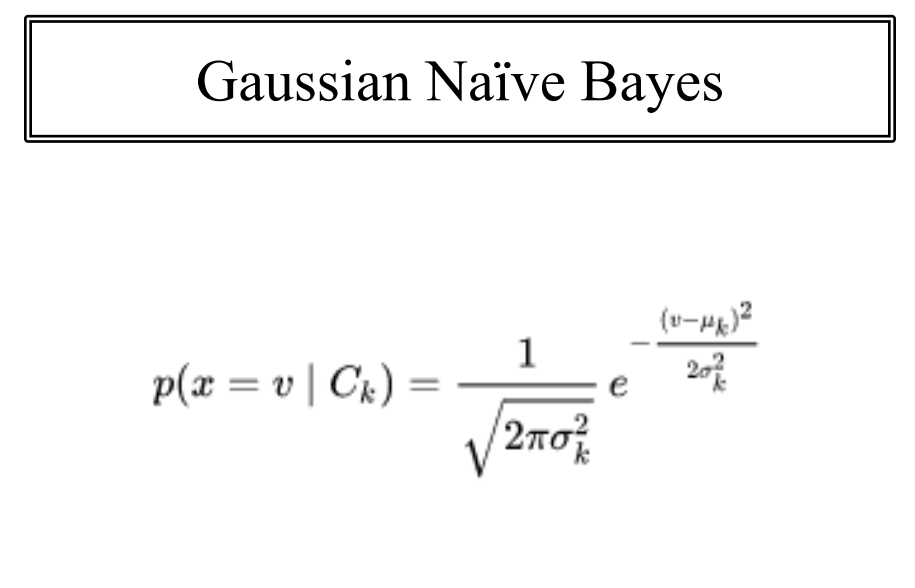

[Example of Naive Bayes](https://www.saedsayad.com/naive_bayesian.htm)

# Naive Bayes

[Tutorial - How to build a Spam Classifier in python and sklearn - milindsoorya.site](https://milindsoorya.site/blog/build-a-spam-classifier-in-python)

In [82]:
train_spam = ['send us your password', 'review our website', 'send your password', 'send us your account']
train_ham = ['Your activity report','benefits physical activity', 'the importance vows']
test_spam = ['renew your password', 'renew your vows']
test_ham = ['benefits of our account', 'the importance of physical activity']

In [83]:
import pandas as pd

In [84]:
data = pd.DataFrame({
    'text': train_spam + test_spam + train_ham + test_ham,
    'label': [1] * (len(train_spam) + len(test_spam)) + [0] * (len(train_ham) + len(test_ham))
})
data

,text,label
0,send us your password,1
1,review our website,1
2,send your password,1
3,send us your account,1
4,renew your password,1
5,renew your vows,1
6,Your activity report,0
7,benefits physical activity,0
8,the importance vows,0
9,benefits of our account,0


In [85]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#remove the punctuations and stopwords
import string

def text_process(text):

    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return " ".join(text)

text = data['text'].apply(text_process)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
from collections import Counter

total_counts = Counter()
for i in range(len(text)):
    for word in text.values[i].split(' '):
        total_counts[word] += 1

print("Total words in data set: ", len(total_counts))

Total words in data set:  13


In [87]:
vocab = sorted(total_counts, key=total_counts.get, reverse=True)
print(vocab)

['send', 'password', 'activity', 'us', 'account', 'renew', 'vows', 'benefits', 'physical', 'importance', 'review', 'website', 'report']


In [88]:
vocab_size = len(vocab)
word2idx = {}
#print vocab_size
for i, word in enumerate(vocab):
    word2idx[word] = i
    
word2idx

{'send': 0,
 'password': 1,
 'activity': 2,
 'us': 3,
 'account': 4,
 'renew': 5,
 'vows': 6,
 'benefits': 7,
 'physical': 8,
 'importance': 9,
 'review': 10,
 'website': 11,
 'report': 12}

In [89]:
def text_to_vector(text):
    word_vector = np.zeros(vocab_size)
    for word in text.split(" "):
        if word2idx.get(word) is None:
            continue
        else:
            word_vector[word2idx.get(word)] += 1
    return np.array(word_vector)

In [90]:
import numpy as np

word_vectors = np.zeros((len(text), len(vocab)), dtype=np.int_)
for i, t in enumerate(text):
    word_vectors[i] = text_to_vector(t)

word_vectors, word_vectors.shape

(array([[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0],
        [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0]]),
 (11, 13))

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(word_vectors, data['label'], test_size=0.5, random_state=111)

In [92]:
from sklearn.naive_bayes import MultinomialNB

In [93]:
mnb = MultinomialNB(alpha=0.2)

In [94]:
pred_scores_word_vectors = []

mnb.fit(X_train, y_train)
mnb.predict(X_test)

array([1, 1, 0, 0, 1, 1], dtype=int64)

In [95]:
y_test

5    1
0    1
7    0
8    0
2    1
1    1
Name: label, dtype: int64

In [96]:
mnb.predict_proba(X_test)

array([[0.13545966, 0.86454034],
       [0.00343377, 0.99656623],
       [0.99661845, 0.00338155],
       [0.84941176, 0.15058824],
       [0.02544942, 0.97455058],
       [0.48456376, 0.51543624]])

## TF-IDF - Term Frequency- Inverted Document Frequency
- View documents as __Bags Of Words__
- Mary lent John some money. = John lent Mary some money.
- Formula: 

$$TF * IDF (word, document) = (1+log(tf(word, document)) * log(\frac{n}{df(word)})$$
- n - total number of documents

### Term Frequency
- __Frequency of word in a document (here, raw count)__
- __0 if the term is not met in the document!!!__
- Relevance does not increase proportionally with frequency -> __log (base of 10)__
- Makes TF-IDF __increase with the number of occurrences__ within a doc

### Document Frequency
- __Number of documents containing the word__ - an inversed measure of significance
- Logarithm with base 10 dampens the effect of IDF
- Affects ranking of queries with __at least 2 terms__
- Makes TFIDF __increase with the rarity of the term in the collection__

In [97]:
documents = [
    "Ross Edgley, at 33 - first man to swim around Britain",
    "Ross Edgley to Circumnavigate Britain Spent 5 Months at Sea",
    "Get Set 4 Swimming - H2OMG! Can this man swim around Britain?",
    "Welcome to the world of strongman swimming | British GQ",
]
query = "Who was the first man ever to swim around Britain?"

In [98]:
# ! pip3 install sklearn
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(documents)
print(count_vectorizer.vocabulary_)  # word to id

{'ross': 15, 'edgley': 7, 'at': 2, '33': 0, 'first': 8, 'man': 12, 'to': 24, 'swim': 20, 'around': 1, 'britain': 3, 'circumnavigate': 6, 'spent': 18, 'months': 13, 'sea': 16, 'get': 9, 'set': 17, 'swimming': 21, 'h2omg': 11, 'can': 5, 'this': 23, 'welcome': 25, 'the': 22, 'world': 26, 'of': 14, 'strongman': 19, 'british': 4, 'gq': 10}


In [99]:
# transform produces a sparse representations of documents - only values != 0
# we need toarray() to preview the whole lists
count_vectorizer.transform(documents).toarray()

array([[1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0],
       [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
        1, 0, 1, 1, 1]], dtype=int64)

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=2)
tfidf_vectorizer.fit_transform(documents).toarray()
tfidf_vectorizer.vocabulary_

{'ross': 5,
 'edgley': 3,
 'at': 1,
 'man': 4,
 'to': 8,
 'swim': 6,
 'around': 0,
 'britain': 2,
 'swimming': 7}

# Naive Base

## TF-IDF - Term Frequency- Inverted Document Frequency
- View documents as __Bags Of Words__
- Mary lent John some money. = John lent Mary some money.
- Formula: 

$$TF * IDF (word, document) = (1+log(tf(word, document)) * log(\frac{n}{df(word)})$$
- n - total number of documents
### Term Frequency
- __Frequency of word in a document (here, raw count)__
- __0 if the term is not met in the document!!!__
- Relevance does not increase proportionally with frequency -> __log (base of 10)__
- Makes TF-IDF __increase with the number of occurrences__ within a doc
### Document Frequency
- __Number of documents containing the word__ - an inversed measure of significance
- Logarithm with base 10 dampens the effect of IDF
- Affects ranking of queries with __at least 2 terms__
- Makes TFIDF __increase with the rarity of the term in the collection__
documents = [
    "Ross Edgley, at 33 - first man to swim around Britain",
    "Ross Edgley to Circumnavigate Britain Spent 5 Months at Sea",
    "Get Set 4 Swimming - H2OMG! Can this man swim around Britain?",
    "Welcome to the world of strongman swimming | British GQ",
]
query = "Who was the first man ever to swim around Britain?"
# ! pip3 install sklearn
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer()
count_vectorizer.fit(documents)
print(count_vectorizer.vocabulary_)  # word to id
# transform produces a sparse representations of documents - only values != 0
# we need toarray() to preview the whole lists
count_vectorizer.transform(documents).toarray()
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=2)
tfidf_vectorizer.fit_transform(documents).toarray()
tfidf_vectorizer.vocabulary_

### The Data

Source: https://www.kaggle.com/crowdflower/twitter-airline-sentiment?select=Tweets.csv

This data originally came from Crowdflower's Data for Everyone library.

As the original source says,

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

#### The Goal: Create a Machine Learning Algorithm that can predict if a tweet is positive, neutral, or negative. In the future we could use such an algorithm to automatically read and flag tweets for an airline for a customer service agent to reach out to contact.

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("Data/airline_tweets.csv")

In [103]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline', ylabel='count'>

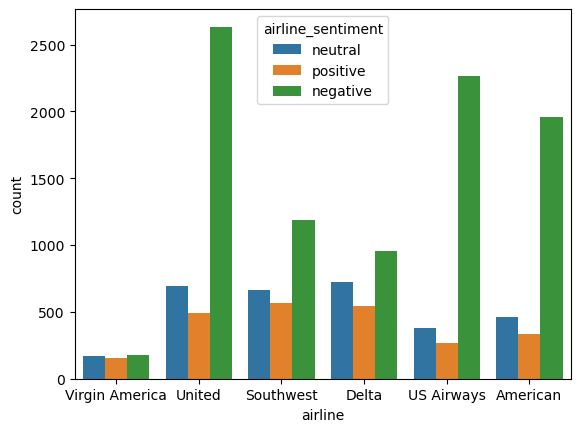

In [104]:
sns.countplot(data=df, x="airline", hue="airline_sentiment")

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Bad Flight'),
  Text(1, 0, "Can't Tell"),
  Text(2, 0, 'Late Flight'),
  Text(3, 0, 'Customer Service Issue'),
  Text(4, 0, 'Flight Booking Problems'),
  Text(5, 0, 'Lost Luggage'),
  Text(6, 0, 'Flight Attendant Complaints'),
  Text(7, 0, 'Cancelled Flight'),
  Text(8, 0, 'Damaged Luggage'),
  Text(9, 0, 'longlines')])

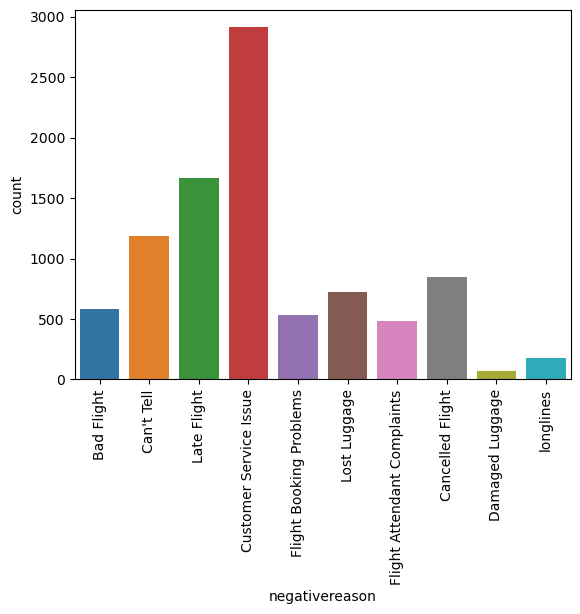

In [105]:
sns.countplot(data=df, x="negativereason")
plt.xticks(rotation=90)

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

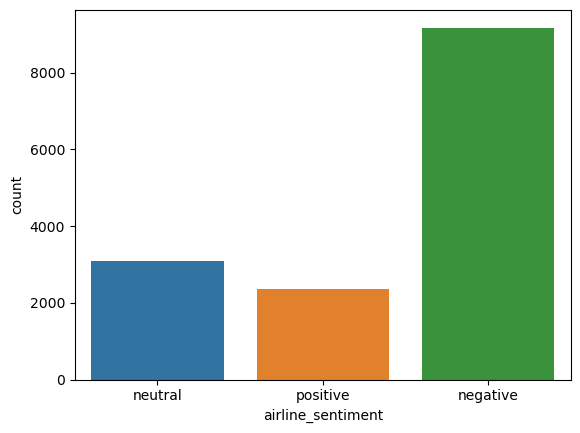

In [106]:
sns.countplot(data=df, x="airline_sentiment")

In [107]:
df["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

## Features and Label

In [108]:
data = df[["airline_sentiment", "text"]]

In [109]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [110]:
y = df["airline_sentiment"]
X = df["text"]

### Train Test Split

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=101
)

## Vectorization

In [113]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [114]:
countVec = CountVectorizer(stop_words="english")

In [115]:
countVec.fit(X_train)

CountVectorizer(stop_words='english')

In [116]:
X_train_countVec = countVec.transform(X_train)
X_test_countVec = countVec.transform(X_test)

In [117]:
X_train_countVec

<11712x12971 sparse matrix of type '<class 'numpy.int64'>'
	with 107073 stored elements in Compressed Sparse Row format>

In [118]:
tfidf = TfidfVectorizer(stop_words="english")

In [119]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [120]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [121]:
X_train_tfidf

<11712x12971 sparse matrix of type '<class 'numpy.float64'>'
	with 107073 stored elements in Compressed Sparse Row format>

**DO NOT USE .todense() for such a large sparse matrix!!!**

## Naive Bayes

In [122]:
from sklearn.naive_bayes import MultinomialNB

In [123]:
nb_cv = MultinomialNB()
nb_cv.fit(X_train_countVec, y_train)

MultinomialNB()

In [124]:
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

## Performance Evaluation

In [125]:
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    classification_report,
    confusion_matrix,
)

In [126]:
def report(model):
    preds = model.predict(X_test_tfidf)
    print(classification_report(y_test, preds))
    cm = confusion_matrix(y_test, preds, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()

Count vectorization model
              precision    recall  f1-score   support

    negative       0.71      0.98      0.82      1817
     neutral       0.75      0.29      0.41       628
    positive       0.84      0.31      0.45       483

    accuracy                           0.72      2928
   macro avg       0.77      0.53      0.56      2928
weighted avg       0.74      0.72      0.67      2928



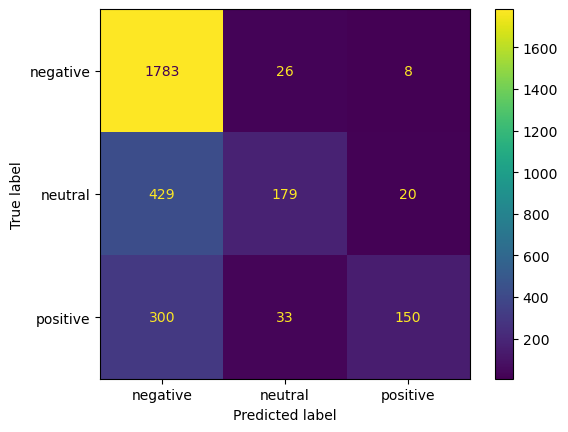

In [127]:
print("Count vectorization model")
report(nb_cv)

Tf-idf model
              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



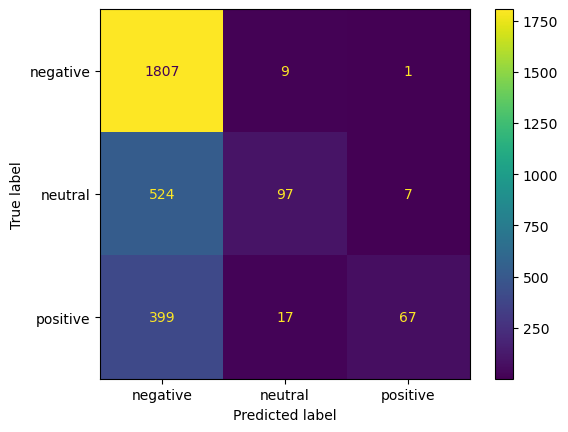

In [128]:
print("Tf-idf model")
report(nb_tfidf)

### Finalizing a PipeLine for Deployment on  New Tweets

If we were satisfied with a model's performance, we should set up a pipeline that can take in a tweet directly.

In [129]:
from sklearn.pipeline import Pipeline

In [130]:
pipe = Pipeline([("tfidf", TfidfVectorizer()), ("naiveBase", MultinomialNB())])

In [131]:
pipe.fit(df["text"], df["airline_sentiment"])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('naiveBase', MultinomialNB())])

In [132]:
new_tweet = ["good flight"]
pipe.predict(new_tweet)

array(['negative'], dtype='<U8')

In [133]:
new_tweet = ["bad flight"]
pipe.predict(new_tweet)

array(['negative'], dtype='<U8')

In [134]:
new_tweet = ["ok flight"]
pipe.predict(new_tweet)

array(['negative'], dtype='<U8')